<a href="https://colab.research.google.com/github/550tealeaves/DATA-70500-working-with-data/blob/main/Final_project_DATA_70500_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Analysis using the American Trends Panel W124, by Pew Research Survey Data**



### (1) Install libraries and read in the dataset

In [ ]:
# Code block 1ab: Installing some libraries
!pip install pyreadstat
!pip install researchpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 24.7 MB/s eta 0:00:00


In [ ]:
# Code block 1b: Libraries - will use the CategoricalDtype for ordinal variables
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sb
import math
import matplotlib.pyplot as plt
import researchpy as rp
from pandas.api.types import CategoricalDtype

You can download the data from the Pew Center, https://www.pewresearch.org/science/datasets/ and then copy the files to your Drive and read the data into your notebook.

For this assignment, we will use the American Trends Panel Wave 124 - https://www.pewresearch.org/dataset/american-trends-panel-wave-124/
The data download includes a codebook for the survey, a methodology of the collection process, the questionnaire in PDF form in this case, and a README file that contains recent research released using that dataset.


In [ ]:
# Code block 2: Reading in data
# Use read_spss to read the SPSS file into a new data object.

ATPW124_df = pd.read_spss('ATP W124.sav')

### Both SPSS & STATA combine numeric representation of data & the data labels value labels

- SPSS & STATA can separate data in the spreadsheet, but pandas can't

- Must make a choice - do we keep the numbers or do we keep the labels?
- Default view of SPSS is to convert categorical variables (vars w/ labels) into categorical objects w/in dataframe, rather than numbers to discard the #s & just keep the labels
- Strings refer to the name of the category

### (2) Inspect variables to ensure dataset was loaded properly

In [ ]:
ATPW124_df.head()

,QKEY,INTERVIEW_START_W124,INTERVIEW_END_W124,DEVICE_TYPE_W124,LANG_W124,FORM_W124,XW122NONRESP_W124,ECON_SIT_W124,SATISFIED_DEMOCRACY_W124,FAV_US_W124,...,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_PARTYSUMIDEO_FINAL,F_REG,F_INC_SDT1,F_IDEO,F_INTFREQ,F_VOLSUM,F_INC_TIER2,WEIGHT_W124
0,100598.0,2023-03-23 13:25:24,2023-03-23 13:41:43,Laptop/PC,English,Form 2,Did not respond to W122,Somewhat good,Not too satisfied,Somewhat favorable,...,NaN,Rep/Lean Rep,Conservative Rep/Lean,You are ABSOLUTELY CERTAIN that you are regist...,"$100,000 or more",Conservative,Several times a day,Yes,Upper income,0.958677
1,101493.0,2023-03-21 15:55:04,2023-03-23 15:40:38,Laptop/PC,English,Form 2,Did not respond to W122,Very bad,Not at all satisfied,Very unfavorable,...,NaN,Rep/Lean Rep,Conservative Rep/Lean,You are ABSOLUTELY CERTAIN that you are regist...,"$80,000 to less than $90,000",Conservative,Several times a day,No,Middle income,0.161169
2,102198.0,2023-03-22 08:42:42,2023-03-22 08:53:18,Laptop/PC,English,Form 1,Did not respond to W122,Somewhat bad,Not too satisfied,Very favorable,...,NaN,Rep/Lean Rep,Conservative Rep/Lean,You are ABSOLUTELY CERTAIN that you are regist...,"$90,000 to less than $100,000",Conservative,Almost constantly,Yes,Middle income,1.131682
3,106180.0,2023-03-21 16:16:59,2023-03-21 16:38:20,Laptop/PC,English,Form 2,Did not respond to W122,Very bad,Not at all satisfied,Somewhat favorable,...,NaN,Rep/Lean Rep,Conservative Rep/Lean,You are ABSOLUTELY CERTAIN that you are regist...,"$100,000 or more",Very conservative,Several times a day,Yes,Middle income,0.844816
4,108348.0,2023-03-25 18:48:43,2023-03-25 19:01:10,Laptop/PC,English,Form 2,Did not respond to W122,Somewhat bad,Somewhat satisfied,Somewhat favorable,...,The Republican Party,Rep/Lean Rep,Conservative Rep/Lean,You are ABSOLUTELY CERTAIN that you are regist...,"$40,000 to less than $50,000",Conservative,Several times a day,No,Middle income,1.321044


### (3) Use list(dfName.columns) to get a full list of variables of data frame


In [ ]:
list(ATPW124_df.columns)

['QKEY',
 'INTERVIEW_START_W124',
 'INTERVIEW_END_W124',
 'DEVICE_TYPE_W124',
 'LANG_W124',
 'FORM_W124',
 'XW122NONRESP_W124',
 'ECON_SIT_W124',
 'SATISFIED_DEMOCRACY_W124',
 'FAV_US_W124',
 'FAV_CHINA_W124',
 'FAV_EU_W124',
 'FAV_UN_W124',
 'FAV_NATO_W124',
 'FAV_RUSSIA_W124',
 'FAV_INDIA_W124',
 'FAV_UKRAINE_W124',
 'FAV_TAIWAN_W124',
 'FAVPOL_BIDEN_W124',
 'FAVPOL_TRUMP_W124',
 'PARTYFAV_REP_W124',
 'PARTYFAV_DEM_W124',
 'ACTIVE_W124',
 'COMPROMISE_W124',
 'ECON_POWER_W124',
 'CONFID_XI_W124',
 'CONFID_PUTIN_W124',
 'CONFID_MACRON_W124',
 'CONFID_SCHOLZ_W124',
 'CONFID_ZELENSKYY_W124',
 'CONFID_MODI_W124',
 'CONFID_NETANYAHU_W124',
 'CONFID_XI_DK_W124',
 'CONFID_PUTIN_DK_W124',
 'CONFID_MACRON_DK_W124',
 'CONFID_SCHOLZ_DK_W124',
 'CONFID_ZELENSKYY_DK_W124',
 'CONFID_MODI_DK_W124',
 'CONFID_NETANYAHU_DK_W124',
 'TIKTOK_KNOW_W124',
 'ALPHABET_W124',
 'TIKTOK_W124',
 'USCOMP_DANG_W124',
 'USCOMP_RELIG_W124',
 'USCOMP_TOL_W124',
 'USCOMP_DEM_W124',
 'USCOMP_STA_W124',
 'USBEST_COLLEGE_

## State research question
- **What is the relationship between satisfaction with the way democracy works in the US and the opinion of US political stability compared to other wealthy nations?**



### (4) Inspect dependent variable and recode to remove missing variables

In [ ]:
# Code block 3: Inspecting variables
# What is the relationship between how satisfied American respodents are with the way democracy works in the US and what they think of the choice of political parties?

# what do you do with missing data? - treat it as missing b/c we don't know what the respondent would have answered

ATPW124_df['SATISFIED_DEMOCRACY_W124'].value_counts()

,count
SATISFIED_DEMOCRACY_W124,
Not too satisfied,1547
Somewhat satisfied,1157
Not at all satisfied,670
Very satisfied,151
Refused,51


### (5) Treating "refused" response
- Convert it to NaN (not a number)
- **Default order for categorical variables = alphabetical**

In [ ]:
#If string has "refused", convert it to not a number (missing), if not refused, then keep the original value

ATPW124_df['SATISFIED_DEMOCRACY_W124r'] = np.where(ATPW124_df['SATISFIED_DEMOCRACY_W124'].str.contains('Refused'), np.nan, ATPW124_df['SATISFIED_DEMOCRACY_W124'])
ATPW124_df['SATISFIED_DEMOCRACY_W124r'].value_counts()

,count
SATISFIED_DEMOCRACY_W124r,
Not too satisfied,1547
Somewhat satisfied,1157
Not at all satisfied,670
Very satisfied,151


### (6) Maintain the order of ordinal variables by using CategoricalDtype
- Ordinal variables - category order matters

In [ ]:
# Var cat_type will preserve the order of the categories (goes from a very satisfied to not at all satisifed
cat_type = CategoricalDtype(categories=["Very satisfied", "Somewhat satisfied", "Not too satisfied", "Not at all satisfied"], ordered=True)

# Apply var cat_type to data frame & recoded var that has NaN for missing
ATPW124_df['SATISFIED_DEMOCRACY_W124r2'] = ATPW124_df['SATISFIED_DEMOCRACY_W124r'].astype(cat_type)
ATPW124_df['SATISFIED_DEMOCRACY_W124r2']

,SATISFIED_DEMOCRACY_W124r2
0,Not too satisfied
1,Not at all satisfied
2,Not too satisfied
3,Not at all satisfied
4,Somewhat satisfied
...,...
3571,Not too satisfied
3572,Somewhat satisfied
3573,Somewhat satisfied
3574,Not too satisfied


### (7) Identify nominal variable
- Order does not matter, so do not have to use CategoricalDtype to adjust the order [US political stability in comparison to other wealthy nations]

In [ ]:
ATPW124_df['USCOMP_STA_W124'].value_counts()

,count
USCOMP_STA_W124,
About as politically stable as other wealthy nations,1443
A less politically stable nation than other wealthy nations,1137
A more politically stable nation than other wealthy nations,939
Refused,57


In [ ]:
# Recode 'Refused' as NaN
ATPW124_df['USCOMP_STA_W124r'] = np.where(ATPW124_df['USCOMP_STA_W124'].str.contains('Refused'), np.nan, ATPW124_df['USCOMP_STA_W124'])
ATPW124_df['USCOMP_STA_W124r'].value_counts()

,count
USCOMP_STA_W124r,
About as politically stable as other wealthy nations,1443
A less politically stable nation than other wealthy nations,1137
A more politically stable nation than other wealthy nations,939


In [ ]:
ATPW124_df['USCOMP_STA_W124r']

,USCOMP_STA_W124r
0,About as politically stable as other wealthy n...
1,A more politically stable nation than other we...
2,A more politically stable nation than other we...
3,A less politically stable nation than other we...
4,A more politically stable nation than other we...
...,...
3571,A less politically stable nation than other we...
3572,A more politically stable nation than other we...
3573,A more politically stable nation than other we...
3574,About as politically stable as other wealthy n...


### (8) Create tables

1.   Cross-tabulation - 2 way percentage table
2.   Signficance tab - Chi square test = main statistic

- Is the table reliable at p < 0.05


---


- **To create cross & sig tables, must first convert the categoricals**

In [ ]:
# Code block 4a: Analysis with a crosstabulation (bivariate percentage table)

# Create crosstab and then significance tables
crosstab, sigtab = rp.crosstab(ATPW124_df.SATISFIED_DEMOCRACY_W124r2, ATPW124_df.USCOMP_STA_W124r, prop='col', test='chi-square')
crosstab

/usr/local/lib/python3.10/dist-packages/researchpy/crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pearson Chi-square ( 6.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


USCOMP_STA_W124r  \
USCOMP_STA_W124r           A less politically stable nation than other wealthy nations   
SATISFIED_DEMOCRACY_W124r2                                                               
Very satisfied                                                           2.40            
Somewhat satisfied                                                      20.91            
Not too satisfied                                                       47.15            
Not at all satisfied                                                    29.54            
All                                                                    100.00            

                                                                                        \
USCOMP_STA_W124r           A more politically stable nation than other wealthy nations   
SATISFIED_DEMOCRACY_W124r2                                                               
Very satisfied                                                           8.28            
Somewhat satisfied                                                      42.04            
Not too satisfied                                                       37.74            
Not at all satisfied                                                    11.94            
All                                                                    100.00            

                                                                                 \
USCOMP_STA_W124r           About as politically stable as other wealthy nations   
SATISFIED_DEMOCRACY_W124r2                                                        
Very satisfied                                                           3.31     
Somewhat satisfied                                                      36.27     
Not too satisfied                                                       45.28     
Not at all satisfied                                                    15.14     
All                                                                    100.00     

                                    
USCOMP_STA_W124r               All  
SATISFIED_DEMOCRACY_W124r2          
Very satisfied                4.35  
Somewhat satisfied           32.84  
Not too satisfied            43.87  
Not at all satisfied         18.94  
All                         100.00

### (9) Table interpretation

**Cross tab**
- For respondents who believe that the US is less politically stable than other wealthy nations
-- 47.15% - are not too satisfied with the way democracy is working in the US

- For respondents who believe the US is more politically stable than other wealthy nations
-- 42.04% are somewhat satisfied with the way democracy is working in the US

- For respondents who believe the US is about as politically stable as other wealthy nations
-- 45.28% are not too satisfied with the way democracy is working in the US


---

- Overall for those who believe the US is less or about as politically stable as other wealthy nations, there is a higher percentage of respondents that indicated they were less satisfied with the way democracy works in the US.

- Those who believe the US is more politically stable than other wealthhy nations are overall slightly more satisfied with the way democracy works in the US than less satisfied (50.36% vs 49.68%, respectively)



---



**Sig tab**
- The chi-square statistic of 237.09 is statistically significant at p < 0.05.
- The table is reliable, meaning the observed pattern is due to real differences in beliefs of satisfaction with the way democracy works and the belief that political parties represent views instead of random measurement error. We can reject the null hypothesis that there is no relationship between these two variables.

In [ ]:
print(sigtab)

                Chi-square test   results
0  Pearson Chi-square ( 6.0) =   237.0979
1                    p-value =     0.0000
2                 Cramer's V =     0.1847


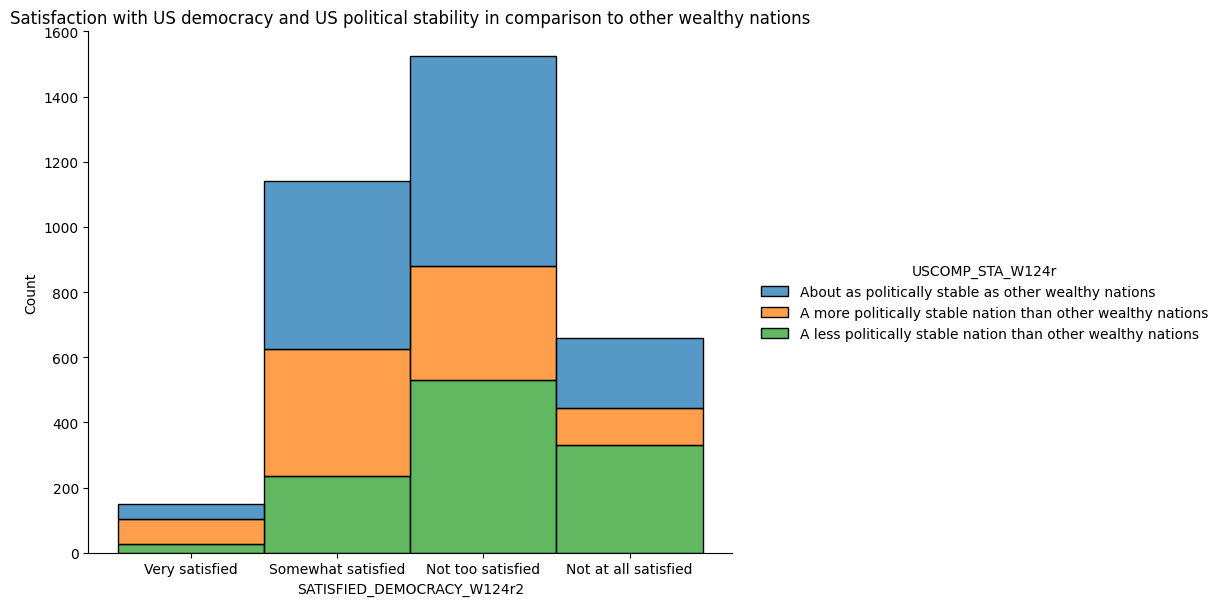

In [ ]:
p = sb.displot(ATPW124_df, x='SATISFIED_DEMOCRACY_W124r2', hue='USCOMP_STA_W124r', multiple="stack", height=6, aspect=1.25)
plt.title('Satisfaction with US democracy and US political stability in comparison to other wealthy nations')
plt.show()

## **Part 2: Now look at how satisfaction in the way democracy works are impacted by the current economic situation in the US**


### (1A) First, handle missing data in the 'ECON_SIT_W124' variable by recoding 'Refused' as Nan




In [ ]:
ATPW124_df['ECON_SIT_W124'].value_counts()

,count
ECON_SIT_W124,
Somewhat bad,1661
Somewhat good,1030
Very bad,808
Very good,68
Refused,9


In [ ]:
# Handle missing var - if string contains 'Refused' recode it as NaN

ATPW124_df['ECON_SIT_W124r'] = np.where(ATPW124_df['ECON_SIT_W124'].str.contains('Refused'), np.nan, ATPW124_df['ECON_SIT_W124'])
ATPW124_df['ECON_SIT_W124r'].value_counts()

,count
ECON_SIT_W124r,
Somewhat bad,1661
Somewhat good,1030
Very bad,808
Very good,68


### (2A) Use CategoricalDtype to preserve the order for the ordinal variable

In [ ]:
# Ordinal variable - use categoricalDtype to maintain order
cat_type2 = CategoricalDtype(categories=["Very good", "Somewhat good", "Somewhat bad", "Very bad"], ordered=True)

# Apply var cat_type2 to data frame & recoded var that has NaN for missing
ATPW124_df['ECON_SIT_W124r2'] = ATPW124_df['ECON_SIT_W124r'].astype(cat_type2)
ATPW124_df['ECON_SIT_W124r2']

,ECON_SIT_W124r2
0,Somewhat good
1,Very bad
2,Somewhat bad
3,Very bad
4,Somewhat bad
...,...
3571,Very bad
3572,Somewhat good
3573,Somewhat good
3574,Very bad


### (3A) Create cross tab and sig tab

In [ ]:
# Code block 4b: More analysis with a crosstabulation (bivariate percentage table)
crosstab, sigtab = rp.crosstab(ATPW124_df.SATISFIED_DEMOCRACY_W124r2, ATPW124_df.ECON_SIT_W124r2, prop='col', test='chi-square')
crosstab

/usr/local/lib/python3.10/dist-packages/researchpy/crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pearson Chi-square ( 9.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


ECON_SIT_W124r2                             \
ECON_SIT_W124r2                  Very good Somewhat good Somewhat bad   
SATISFIED_DEMOCRACY_W124r2                                              
Very satisfied                       47.76          7.30         2.02   
Somewhat satisfied                   32.84         59.76        28.53   
Not too satisfied                    13.43         28.21        58.16   
Not at all satisfied                  5.97          4.73        11.29   
All                                 100.00        100.00       100.00   

                                             
ECON_SIT_W124r2            Very bad     All  
SATISFIED_DEMOCRACY_W124r2                   
Very satisfied                 1.36    4.26  
Somewhat satisfied             7.81   32.86  
Not too satisfied             37.17   43.86  
Not at all satisfied          53.66   19.02  
All                          100.00  100.00

### (4A) Table Interpretation

**Cross tab**
- The cross table shows that the satisfaction in the way democracy works in the US corresponds proportionally (diagonally) with the descriptions of the current economic situation in the US.
- 47.76% of those who described the current economic situation as very good also rated themselves very satisfied with the way democracy works
- 59.76% of those who described the current economic situation as somewhat good also rated themselves as somewhat satisfied with the way democracy works
- 58.16% of those who described the current economic situation as somewhat bad also rated themselves as not too satisifed with the way deomocracy works
- 53.66% of those who described the current economic situation as very bad also rated themselves as not at all satisfied with the way democracy works



---



**Sig tab**
- The chi-square statistic of 1571.27 is statistically significant at p < 0.05.
- The table is reliable, and the observed patterns are due to real differences in descriptions of the current economic situation and the satisfaction in the way democracy operates rather than random measurement error. We can reject the null hypothesis that there is no relationship between the categorical variables.


In [ ]:
sigtab

,Chi-square test,results
0,Pearson Chi-square ( 9.0) =,1571.2689
1,p-value =,0.0000
2,Cramer's V =,0.3858


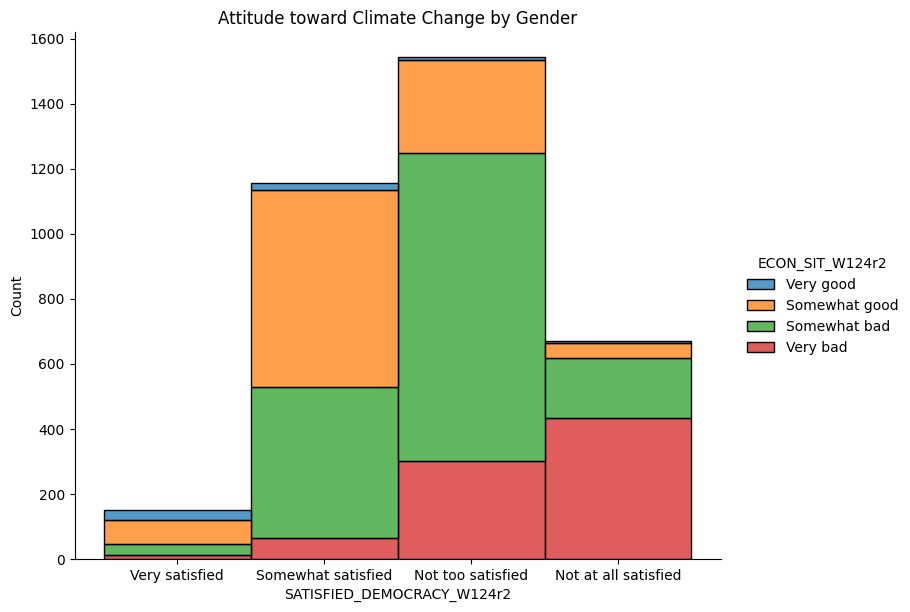

In [ ]:
p = sb.displot(ATPW124_df, x='SATISFIED_DEMOCRACY_W124r2', hue='ECON_SIT_W124r2', multiple="stack", height=6, aspect=1.25)
plt.title('Attitude toward Climate Change by Gender')
plt.show()

# **Part 3: Creating a linear model without converting variables to categoricals**

### (1B) Read in SPSS file and add convert_categoricals=False to preserve the numeric variables (it's TRUE by default)

## **Do NOT convert categoricals if you want to run the linear model**

In [ ]:
# To create a linear model, we will first read in some variables without converting them to categoricals.


Demo_df = pd.read_spss('ATP W124.sav', usecols=['SATISFIED_DEMOCRACY_W124', 'F_AGECAT', 'F_GENDER', 'F_EDUCCAT', 'F_HISP', 'F_RACECMB', 'F_METRO', 'F_CITIZEN', 'F_PARTY_FINAL', 'F_INC_TIER2', 'ECON_SIT_W124'], convert_categoricals=False)

### (2B) Create **BINARY** variables to identify demographic characteristics to model
- Divide the survey question into 2 categories (yes/no)
- Create variable to describe the high category vs the low category
- Set the new variable to 0 and then switch it to 1 for some respondents
- Code below uses a more condensed version of the np.where statement
-- Where is an if/then question


In [ ]:
# Is the respondent young or not?
Demo_df['young'] = 0
Demo_df.loc[Demo_df['F_AGECAT'] == 1, ['young']] = 1

# Is respondent a woman?
Demo_df['women'] = 0
Demo_df.loc[Demo_df['F_GENDER'] == 2, ['women']] = 1

# Does respondent have college degree?
Demo_df['college'] = 0
Demo_df.loc[Demo_df['F_EDUCCAT'] == 1, ['college']] = 1

# Is respondent black or not?
Demo_df['black'] = 0
Demo_df.loc[Demo_df['F_RACECMB'] == 2, ['black']] = 1

# Is respondent Latino or not?
Demo_df['latin'] = 0
Demo_df.loc[Demo_df['F_HISP'] == 1, ['latin']] = 1

# Does respondent live in a metropolitan area?
Demo_df['metro'] = 0
Demo_df.loc[Demo_df['F_METRO'] == 1, ['metro']] = 1

# Does respondent have US citizenaship?
Demo_df['citizen'] = 0
Demo_df.loc[Demo_df['F_CITIZEN'] == 1, ['citizen']] = 1

# Is respondent a republican or not?
Demo_df['republican'] = 0
Demo_df.loc[Demo_df['F_PARTY_FINAL'] == 1, ['republican']] = 1

# Is respondent lower-income?
Demo_df['low-income'] = 0
Demo_df.loc[Demo_df['F_INC_TIER2'] == 1, ['low-income']] = 1

# Does respondent think the current economic situation is good?
Demo_df['good-econ'] = 0
Demo_df.loc[Demo_df['ECON_SIT_W124'] < 3, ['good-econ']] = 1

### (3B) Use .value_counts() to confirm the newly created binary variables are accurate

In [ ]:
Demo_df['young'].value_counts()

,count
young,
0,3081
1,495


In [ ]:
Demo_df['women'].value_counts()

,count
women,
0,2164
1,1412


In [ ]:
Demo_df['college'].value_counts()

,count
college,
0,2043
1,1533


In [ ]:
Demo_df['black'].value_counts()

,count
black,
0,2862
1,714


In [ ]:
Demo_df['latin'].value_counts()

,count
latin,
0,2755
1,821


In [ ]:
Demo_df['metro'].value_counts()

,count
metro,
1,3240
0,336


In [ ]:
Demo_df['citizen'].value_counts()

,count
citizen,
1,3348
0,228


In [ ]:
Demo_df['republican'].value_counts()

,count
republican,
0,2687
1,889


In [ ]:
Demo_df['low-income'].value_counts()

,count
low-income,
0,2623
1,953


In [ ]:
Demo_df['good-econ'].value_counts()

,count
good-econ,
0,2478
1,1098


# Alternative way to create binary variables
## Can create binaries using where
- Code is more efficient but harder to interpret
- Can create binaries using the code above (no where) or the code below (where) - don't need to do both

# **np.where(logical condition, value if true, value if false)**
Example looking at who is rural and who is not
- **ATPW55_df['rural'] = np.where(ATPW55_df['F_METRO'] == 2, 1, 0)**
- logical condition = ATPW55_df['F_METRO'] == 2 (in SPSS, rural is coded as 2, so if F_METRO is set to 2)
- value if true = 1 (If ['F_METRO'] == 2, (TRUE) then recode it as 1
- value if false = 0 (If ['F_METRO'] !== 2, (FALSE -doesn't equal 2), then recode it as 0

In [ ]:
# Or, you can use the where() method in the NumPy library to create a binary using
# a logical test, as done above to code missing values.
# WHERE method
Demo_df['youngr'] = np.where(Demo_df['F_AGECAT'] == 1, 1, 0)

# This is more efficient code, but harder to read when learning Python
Demo_df['youngr'].value_counts()

,count
youngr,
0,3081
1,495


### (4B) Recode satisfaction in the way democracy works variable into binary
- Use where method or not

In [ ]:
# If value is greater than 4, then label as NaN - write this in 2 ways

# (1) No where method
Demo_df.loc[Demo_df['SATISFIED_DEMOCRACY_W124'] > 4, ['SATISFIED_DEMOCRACY_W124']] = np.nan

# (2) Where method:
Demo_df['SATISFIED_DEMOCRACY_W124r'] = np.where(Demo_df['SATISFIED_DEMOCRACY_W124'] > 4, np.nan, Demo_df['SATISFIED_DEMOCRACY_W124'])

Demo_df['SATISFIED_DEMOCRACY_W124r'].value_counts()

,count
SATISFIED_DEMOCRACY_W124r,
3.0,1547
2.0,1157
4.0,670
1.0,151


### (5B) Create linear model to predict the level of satisfaction with the way democracy works using the original variable and controls

In [ ]:
# Linear model to predict satisfaction in democracy operations using the original variable
Y = Demo_df['SATISFIED_DEMOCRACY_W124'] # A higher score indicates greater satisfaction with how democracy works
X = Demo_df[['young', 'women', 'college', 'black', 'latin', 'metro', 'citizen', 'republican', 'low-income']]
X = sm.add_constant(X)
model0 = sm.OLS(Y, X, missing='drop').fit()
print(model0.summary())

                               OLS Regression Results                               
Dep. Variable:     SATISFIED_DEMOCRACY_W124   R-squared:                       0.068
Model:                                  OLS   Adj. R-squared:                  0.065
Method:                       Least Squares   F-statistic:                     28.28
Date:                      Tue, 24 Dec 2024   Prob (F-statistic):           7.02e-48
Time:                              17:08:22   Log-Likelihood:                -4090.7
No. Observations:                      3525   AIC:                             8201.
Df Residuals:                          3515   BIC:                             8263.
Df Model:                                 9                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

### (6B) Create linear model to predict the level of satisfaction with the way democracy works using the recoded variable

In [ ]:
# Same model, with the recoded dependent variable, showing the same results.
# Linear model to predict satisfaction with the way democracy works
Y = Demo_df['SATISFIED_DEMOCRACY_W124r'] # A higher score indicates more satisfaction with the way democracy works
X = Demo_df[['young', 'women', 'college', 'black', 'latin', 'metro', 'citizen', 'republican', 'low-income']]
X = sm.add_constant(X)
model1 = sm.OLS(Y, X, missing='drop').fit()
print(model1.summary())

                                OLS Regression Results                               
Dep. Variable:     SATISFIED_DEMOCRACY_W124r   R-squared:                       0.068
Model:                                   OLS   Adj. R-squared:                  0.065
Method:                        Least Squares   F-statistic:                     28.28
Date:                       Tue, 24 Dec 2024   Prob (F-statistic):           7.02e-48
Time:                               17:08:47   Log-Likelihood:                -4090.7
No. Observations:                       3525   AIC:                             8201.
Df Residuals:                           3515   BIC:                             8263.
Df Model:                                  9                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

### (7B) Linear Regression Model Interpretation
- Adjusted R-squared shows that about 6.8% of the variance in the satisfaction of how US democracy operates can be explained by the explanatory variables. Such a low R-squared indicates that this is a weak model
- The F-statistic is statistically significant at p < 0.05, so we can reject the null hypothesis that all the regression coefficients are equal to 0, resulting in a model with no predictive capability.


---


Still, there are several explanatory variables that are statistically significant at p < 0.05.
1. **College** - for each additional year of education, the satisfaction with US democracy operation *decreases by -0.11*
2. **Black** - for each incremental increase in the amount of black respondents, the satsifaction with US democracy operation *decreases by -0.11*
3. **Hispanic** - for each incremental increase in the amount of Hispanic respondents, the satisfsaction with US democracy operation *decreases by -0.14*
4. **Citizen** - for each incremental increase in US citizens, the satisfaction with US democracy operation *increases by 0.22*
5. **Republican** - for each incremental increase in republicans, the satisfaction with US democracy operation *increases by 0.37*




## **(8B) Revise the linear model**
- Add the variable of current economic situation


---
- Model actually loses reliability - adjusted R-squared drops is the same as before, but the R-squared value drops slightly in this simpler model


In [ ]:
# Linear model to predict satisfaction in democracy operations using the original variable
Y = Demo_df['SATISFIED_DEMOCRACY_W124'] # A higher score indicates greater satisfaction with how democracy works
X = Demo_df[['young', 'women', 'college', 'black', 'latin', 'metro', 'citizen', 'republican', 'low-income', 'good-econ']]
X = sm.add_constant(X)
model0 = sm.OLS(Y, X, missing='drop').fit()
print(model0.summary())

                               OLS Regression Results                               
Dep. Variable:     SATISFIED_DEMOCRACY_W124   R-squared:                       0.207
Model:                                  OLS   Adj. R-squared:                  0.205
Method:                       Least Squares   F-statistic:                     91.70
Date:                      Tue, 24 Dec 2024   Prob (F-statistic):          8.81e-169
Time:                              17:05:29   Log-Likelihood:                -3805.3
No. Observations:                      3525   AIC:                             7633.
Df Residuals:                          3514   BIC:                             7700.
Df Model:                                10                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

### Revised linear model with recoded dependent variable (same results as non-recoded)

In [ ]:
# Same model, with the recoded dependent variable, showing the same results.
# Linear model to predict satisfaction with the way democracy works
Y = Demo_df['SATISFIED_DEMOCRACY_W124r'] # A higher score indicates more satisfaction with the way democracy works
X = Demo_df[['young', 'women', 'college', 'black', 'latin', 'metro', 'citizen', 'republican', 'low-income', 'good-econ']]
X = sm.add_constant(X)
model1 = sm.OLS(Y, X, missing='drop').fit()
print(model1.summary())

                                OLS Regression Results                               
Dep. Variable:     SATISFIED_DEMOCRACY_W124r   R-squared:                       0.207
Model:                                   OLS   Adj. R-squared:                  0.205
Method:                        Least Squares   F-statistic:                     91.70
Date:                       Tue, 24 Dec 2024   Prob (F-statistic):          8.81e-169
Time:                               17:05:56   Log-Likelihood:                -3805.3
No. Observations:                       3525   AIC:                             7633.
Df Residuals:                           3514   BIC:                             7700.
Df Model:                                 10                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

### Revised linear model interpretation
- Adjusted R-squared increased substantially to 0.205; 20.5% of the variance in the satisfaction in democracy can be explained by the indenpendent variables in the model

- Race is no longer statistically significant

---

Examining the explanatory variables that are statistically significant at p < 0.05.
1. **College** - for each additional year of education, the satisfaction with US democracy operation *decreases by -0.08*
2. **Hispanic** - for each incremental increase in the amount of Hispanic respondents, the satisfsaction with US democracy operation *decreases by -0.09*
3. **Citizen** - for each incremental increase in US citizens, the satisfaction with US democracy operation *increases by 0.21*
4. **Republican** - for each incremental increase in republicans, the satisfaction with US democracy operation *increases by 0.25*
5. **Good-economy** - for each incremental increase in how good the current economic situation is described, the satisfaction with US democracy operation *decreases by 0.67*



---

The results of current economic situation are a bit surprising because one would think that positive feelings of the current economic situation would correlate with higher satisfaction in the way democracy, where that economic situation exists, works.



### **(9B) Revise the linear model to remove the variables that are not statistically significant**
- Model only has the demographic variables

In [ ]:
# Same model, with the recoded dependent variable, showing the same results.
# Linear model to predict satisfaction with the way democracy works
Y = Demo_df['SATISFIED_DEMOCRACY_W124'] # A higher score indicates more satisfaction with the way democracy works
X = Demo_df[['college', 'latin', 'citizen', 'republican']]
X = sm.add_constant(X)
model1 = sm.OLS(Y, X, missing='drop').fit()
print(model1.summary())

                               OLS Regression Results                               
Dep. Variable:     SATISFIED_DEMOCRACY_W124   R-squared:                       0.063
Model:                                  OLS   Adj. R-squared:                  0.062
Method:                       Least Squares   F-statistic:                     59.29
Date:                      Tue, 24 Dec 2024   Prob (F-statistic):           1.62e-48
Time:                              17:26:12   Log-Likelihood:                -4099.0
No. Observations:                      3525   AIC:                             8208.
Df Residuals:                          3520   BIC:                             8239.
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [ ]:
# Same model, with the recoded dependent variable, showing the same results.
# Linear model to predict satisfaction with the way democracy works
Y = Demo_df['SATISFIED_DEMOCRACY_W124r'] # A higher score indicates more satisfaction with the way democracy works
X = Demo_df[['college', 'latin', 'citizen', 'republican']]
X = sm.add_constant(X)
model1 = sm.OLS(Y, X, missing='drop').fit()
print(model1.summary())

                                OLS Regression Results                               
Dep. Variable:     SATISFIED_DEMOCRACY_W124r   R-squared:                       0.063
Model:                                   OLS   Adj. R-squared:                  0.062
Method:                        Least Squares   F-statistic:                     59.29
Date:                       Tue, 24 Dec 2024   Prob (F-statistic):           1.62e-48
Time:                               17:26:17   Log-Likelihood:                -4099.0
No. Observations:                       3525   AIC:                             8208.
Df Residuals:                           3520   BIC:                             8239.
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

### Revised model with only the statistically significant variables
- Adjusted R-squared of 0.060 shows that only 6.2% of the variance in the dependent variable can be explained by the model
- All the explanatory variables still remain statistically significant at p < 0.05 and move in the same direction as the original

### **(10B) Final model with only statistically significant model and the main independent variable added**

In [ ]:
# Same model, with the recoded dependent variable, showing the same results.
# Linear model to predict satisfaction with the way democracy works
Y = Demo_df['SATISFIED_DEMOCRACY_W124'] # A higher score indicates more satisfaction with the way democracy works
X = Demo_df[['college', 'latin', 'citizen', 'republican', 'good-econ']]
X = sm.add_constant(X)
model1 = sm.OLS(Y, X, missing='drop').fit()
print(model1.summary())

                               OLS Regression Results                               
Dep. Variable:     SATISFIED_DEMOCRACY_W124   R-squared:                       0.206
Model:                                  OLS   Adj. R-squared:                  0.205
Method:                       Least Squares   F-statistic:                     182.9
Date:                      Tue, 24 Dec 2024   Prob (F-statistic):          1.42e-173
Time:                              17:26:44   Log-Likelihood:                -3806.7
No. Observations:                      3525   AIC:                             7625.
Df Residuals:                          3519   BIC:                             7662.
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

### Revised model with recoded variable - same results as non-recoded variable

In [ ]:
# Same model, with the recoded dependent variable, showing the same results.
# Linear model to predict satisfaction with the way democracy works
Y = Demo_df['SATISFIED_DEMOCRACY_W124r'] # A higher score indicates more satisfaction with the way democracy works
X = Demo_df[['college', 'latin', 'citizen', 'republican', 'good-econ']]
X = sm.add_constant(X)
model1 = sm.OLS(Y, X, missing='drop').fit()
print(model1.summary())

                                OLS Regression Results                               
Dep. Variable:     SATISFIED_DEMOCRACY_W124r   R-squared:                       0.206
Model:                                   OLS   Adj. R-squared:                  0.205
Method:                        Least Squares   F-statistic:                     182.9
Date:                       Tue, 24 Dec 2024   Prob (F-statistic):          1.42e-173
Time:                               17:26:51   Log-Likelihood:                -3806.7
No. Observations:                       3525   AIC:                             7625.
Df Residuals:                           3519   BIC:                             7662.
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

### **Final model interpretation**

- Overall R-squred dipped slightly from 0.207 (original model) to 0.206
- Adjusted R-squared is the same for the original model with all the control variables and the final at 0.205. 20.5% of the variance in the satisfaction with the way democracy works can be explained by the explanatory variables.
- All independent variables remain statistically significant at p < 0.05


---

1. **College** - for each additional year of education, the satisfaction with US democracy operation *decreases by -0.08*
2. **Hispanic** - for each incremental increase in the amount of Hispanic respondents, the satisfsaction with US democracy operation *decreases by -0.09*
3. **Citizen** - for each incremental increase in US citizens, the satisfaction with US democracy operation *increases by 0.20*
4. **Republican** - for each incremental increase in republicans, the satisfaction with US democracy operation *increases by 0.26*
5. **Good-economy** - for each incremental increase in how good the current economic situation is described, the satisfaction with US democracy operation *decreases by 0.67*

# **Part 4: Creating a logistic regression mdoel to predict probability of satisfaction with the way democracy works**

### (1C) Recode dependent variable as binary

In [ ]:
# Recode dependent variable as binary
# If somewhat or very satisfied, recode as 1 (yes), and if somewhat or very dissatisfied, recode as 0
Demo_df['satisfied_demo'] = np.where(Demo_df['SATISFIED_DEMOCRACY_W124'] < 3, 1, 0)
Demo_df['satisfied_demo'].value_counts()

,count
satisfied_demo,
0,2268
1,1308


### (2C) Create logistic regression model of original model with only the control variables (sans economic situation)

In [ ]:
# Logistic mregression model to predict satisfaction with democracy
Y = Demo_df['satisfied_demo'] # binary measure of satisfaction with democracy
X = Demo_df[['young', 'women', 'college', 'black', 'latin', 'metro', 'citizen', 'republican', 'low-income']]
#X = sm.add_constant(X) #this hides the constant because it throws me off for the odds ratio calculations
model2 = sm.Logit(Y, X, missing='drop').fit()
print(model2.summary())

Optimization terminated successfully.
         Current function value: 0.629248
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         satisfied_demo   No. Observations:                 3576
Model:                          Logit   Df Residuals:                     3567
Method:                           MLE   Df Model:                            8
Date:                Tue, 24 Dec 2024   Pseudo R-squ.:                 0.04175
Time:                        17:32:52   Log-Likelihood:                -2250.2
converged:                       True   LL-Null:                       -2348.2
Covariance Type:            nonrobust   LLR p-value:                 4.234e-38
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
young         -0.2611      0.106     -2.473      0.013      -0.468      -0.054
women         -0.1465      0.

### (3C) Logistic Regression Model Interpretation
- LLR p-value is statistically significant at p < 0.05, so the model is reliable and the dataset is sufficiently large.
- Pseudo R-squared value (goodness of fit) shows that only 4.2% of the model fits the data.

### (4C) Convert the coefficients to odds so they are interpretable.
- Must exponentiate (or the take anti-logs of) the coefficients in order to interpret them as odds.
- For the negative coefficients, take the inverse of the result & interpret it in the opposite direction (that is, the odds of not being in the high satisfaction of democracy group).
- Can also change the increment of change in X.

In [ ]:
# These odds take the inverse so that it is easier to say
print(1/math.exp(model2.params[0]), 1/math.exp(model2.params[1]), math.exp(model2.params[2]), math.exp(model2.params[3]), math.exp(model2.params[4]), 1/math.exp(model2.params[5]), 1/math.exp(model2.params[6]), 1/math.exp(model2.params[7]), math.exp(model2.params[8]))

1.2983107919006496 1.1577863699345305 1.3206578894697996 1.2932125693685566 1.4102301064337928 1.062955975255495 1.6479993117843676 2.5291394158932117 1.0249444748512226


<ipython-input-79-c82462aa18f0>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(1/math.exp(model2.params[0]), 1/math.exp(model2.params[1]), math.exp(model2.params[2]), math.exp(model2.params[3]), math.exp(model2.params[4]), 1/math.exp(model2.params[5]), 1/math.exp(model2.params[6]), 1/math.exp(model2.params[7]), math.exp(model2.params[8]))


### (5C) Odds ratio interpretation
1. For every 1 unit change in young, there is 1.3 times greater odds of being in the less satisfied with US democracy operation group
2. For every 1 unit change in women, there is 1.16 times greater odds of being in the less satisfied with US democracy operation group
3. For every 1 unit change in college education, there is 1.32 times greater odds of being in the more satisfied with US democracy operation group
4. For every 1 unit change in black, there is 1.29 times greater odds of being in the more satisfied with US democracy operation group
5. For every 1 unit change in Hispanic, there is 1.41 times greater odds of being in the more satisfied with US democracy operation group
6. For every 1 unit change in metropolitan area, there is 1.06 times greater odds of being less satisfied with US democracy operation group
7. For every 1 unit change in citizenship, there is 1.65 times greater odds of being less satisfied with US democracy operation group
8. For every 1 unit change in republican, there is 2.53 times greater odds of being less satisfied with US democracy operation group
9. For every 1 unit change in low-income, there is 1.02 times greater odds of being in the more satisfied with US democracy operation group


---

**Seeing that self-reporting as republican has the highest odds of dissatisfaction with the way democracy in the US works is interesting considering what would happen in the next election.**


In [ ]:
print(np.exp(model2.params)) #These are expressed as odds ratios but the odds ratios less than 1 are a little harder to interpret, see above code for the inverse

young         0.770232
women         0.863717
college       1.320658
black         1.293213
latin         1.410230
metro         0.940773
citizen       0.606796
republican    0.395391
low-income    1.024944
dtype: float64


In [ ]:
model2_marginals = model2.get_margeff(at='median')
print(model2_marginals.summary())

        Logit Marginal Effects       
Dep. Variable:         satisfied_demo
Method:                          dydx
At:                            median
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
young         -0.0604      0.025     -2.447      0.014      -0.109      -0.012
women         -0.0339      0.018     -1.906      0.057      -0.069       0.001
college        0.0643      0.016      3.906      0.000       0.032       0.097
black          0.0595      0.022      2.766      0.006       0.017       0.102
latin          0.0795      0.020      3.931      0.000       0.040       0.119
metro         -0.0141      0.024     -0.591      0.555      -0.061       0.033
citizen       -0.1156      0.022     -5.262      0.000      -0.159      -0.073
republican    -0.2147      0.024     -9.058      0.000      -0.261      -0.168
low-income     0.0057      0.020      0.290      0.772    

### (6C) Revised logisitic regression to include all controls and the economic situation

In [ ]:
# Logistic mregression model to predict satisfaction with democracy
Y = Demo_df['satisfied_demo'] # binary measure of satisfaction with democracy
X = Demo_df[['young', 'women', 'college', 'black', 'latin', 'metro', 'citizen', 'republican', 'low-income', 'good-econ']]
#X = sm.add_constant(X) #this hides the constant because it throws me off for the odds ratio calculations
model2 = sm.Logit(Y, X, missing='drop').fit()
print(model2.summary())

Optimization terminated successfully.
         Current function value: 0.558654
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         satisfied_demo   No. Observations:                 3576
Model:                          Logit   Df Residuals:                     3566
Method:                           MLE   Df Model:                            9
Date:                Tue, 24 Dec 2024   Pseudo R-squ.:                  0.1493
Time:                        17:34:23   Log-Likelihood:                -1997.7
converged:                       True   LL-Null:                       -2348.2
Covariance Type:            nonrobust   LLR p-value:                4.232e-145
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
young         -0.0885      0.114     -0.780      0.436      -0.311       0.134
women         -0.1130      0.

### (7C) Revised Logistic Regression Model Interpretation
- LLR p-value is statistically significant at p < 0.05, so the model is reliable and the dataset is sufficiently large.
- Pseudo R-squared value (goodness of fit) shows that about 15% of the model fits the data.

In [ ]:
# These odds take the inverse so that it is easier to say
print(1/math.exp(model2.params[0]), 1/math.exp(model2.params[1]), math.exp(model2.params[2]), math.exp(model2.params[3]), math.exp(model2.params[4]), 1/math.exp(model2.params[5]), 1/math.exp(model2.params[6]), 1/math.exp(model2.params[7]), 1/math.exp(model2.params[8]), math.exp(model2.params[9]))

1.092518146899218 1.11957844861067 1.1942609450760506 1.101583866033296 1.2289589147227176 1.356388438459737 2.3521316342851404 1.9935488650764674 1.0112233431846156 5.837854127836491


<ipython-input-45-0371ad28c61b>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(1/math.exp(model2.params[0]), 1/math.exp(model2.params[1]), math.exp(model2.params[2]), math.exp(model2.params[3]), math.exp(model2.params[4]), 1/math.exp(model2.params[5]), 1/math.exp(model2.params[6]), 1/math.exp(model2.params[7]), 1/math.exp(model2.params[8]), math.exp(model2.params[9]))


In [ ]:
print(np.exp(model2.params)) #These are expressed as odds ratios but the odds ratios less than 1 are a little harder to interpret, see above code for the inverse

young         0.915317
women         0.893193
college       1.194261
black         1.101584
latin         1.228959
metro         0.737252
citizen       0.425146
republican    0.501618
low-income    0.988901
good-econ     5.837854
dtype: float64


### (8C) Revised Odds ratio interpretation including all controls & economic situation
1. For every 1 unit change in young, there is 1.1 times greater odds of being in the less satisfied with US democracy operation group
2. For every 1 unit change in women, there is 1.12 times greater odds of being in the less satisfied with US democracy operation group
3. For every 1 unit change in college education, there is 1.19 times greater odds of being in the more satisfied with US democracy operation group
4. For every 1 unit change in black, there is 1.10 times greater odds of being in the more satisfied with US democracy operation group
5. For every 1 unit change in Hispanic, there is 1.22 times greater odds of being in the more satisfied with US democracy operation group
6. For every 1 unit change in metropolitan residency, there is 1.35 times greater odds of being less satisfied with US democracy operation group
7. For every 1 unit change in citizenship, there is 2.35 times greater odds of being less satisfied with US democracy operation group
8. For every 1 unit change in republican, there is 1.99 times greater odds of being less satisfied with US democracy operation group
9. For every 1 unit change in low-income, there is 1.01 times greater odds of being in the more satisfied with US democracy operation group
10. For every 1 unit change in good descriptions of the current economic situation, there is 5.83 times greater odds of being in the more satisfied with US democracy operation group


---

**Unlike the linear model, the logistic model shows that there are much higher odds of satisfaction with the the way democracy works for those who describe the current economic situation as good. Compared to the first logistic regression (which excluded economic situation), citizenship had the greatest odds of dissatisfaction with the way democracy in the US works. That did play a factor in the most recent election**


### (9C) Final logistic model (using only the statistically significant variables from the linear model + economic situation)


In [ ]:
# Logistic mregression model to predict satisfaction with democracy
Y = Demo_df['satisfied_demo'] # binary measure of satisfaction with democracy
X = Demo_df[['college', 'latin', 'citizen', 'republican', 'good-econ']]
#X = sm.add_constant(X) #this hides the constant because it throws me off for the odds ratio calculations
model2 = sm.Logit(Y, X, missing='drop').fit()
print(model2.summary())

Optimization terminated successfully.
         Current function value: 0.560451
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         satisfied_demo   No. Observations:                 3576
Model:                          Logit   Df Residuals:                     3571
Method:                           MLE   Df Model:                            4
Date:                Tue, 24 Dec 2024   Pseudo R-squ.:                  0.1465
Time:                        17:50:56   Log-Likelihood:                -2004.2
converged:                       True   LL-Null:                       -2348.2
Covariance Type:            nonrobust   LLR p-value:                1.290e-147
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
college        0.1200      0.075      1.589      0.112      -0.028       0.268
latin          0.1092      0.

### (10C) Revised Logistic Regression Model Interpretation
- LLR p-value is statistically significant at p < 0.05, so the model is reliable and the dataset is sufficiently large.
- Pseudo R-squared value (goodness of fit) shows that 14.6% of the model fits the data, a slight decrease from the original logistic regression model.

In [ ]:
# These odds take the inverse so that it is easier to say
print(math.exp(model2.params[0]), math.exp(model2.params[1]), 1/math.exp(model2.params[2]), 1/math.exp(model2.params[3]), math.exp(model2.params[4]))

1.127443083393237 1.1153346873857044 3.049158679870986 2.040279162803224 5.813707783145707


<ipython-input-48-04d53f1b6e9b>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(math.exp(model2.params[0]), math.exp(model2.params[1]), 1/math.exp(model2.params[2]), 1/math.exp(model2.params[3]), math.exp(model2.params[4]))


In [ ]:
print(np.exp(model2.params)) #These are expressed as odds ratios but the odds ratios less than 1 are a little harder to interpret, see above code for the inverse

college       1.127443
latin         1.115335
citizen       0.327959
republican    0.490129
good-econ     5.813708
dtype: float64


### (11C) Final Odds ratio interpretation including only statistically significant controls & economic situation
1. For every 1 unit change in college education, there is 1.13 times greater odds of being in the *more satisfied* with US democracy operation group
2. For every 1 unit change in Hispanic, there is 1.12 times greater odds of being in the *more satisfied* with US democracy operation group
3. For every 1 unit change in citizenship, there is 3.05 times greater odds of being in the *less satisfied* with US democracy operation group
4. For every 1 unit change in republican, there is 2.04 times greater odds of being in the *less satisfied* with US democracy operation group
5. For every 1 unit change in good descriptions of the current economic situation, there is 5.81 times greater odds of being in the *more satisfied* with US democracy operation group


---

**Odds of dissatisfaction with democracy has increased for both citizenship and republican, and odds for satisfaction with democracy has slightly decreased for economic situation and there were more significant decreases for college and Hispanic. But overall, all 5 of these factors played a key role in the recent election results.**

## Summary
- Based on the analysis of ATP Wave 124, we are unable to predict how satisfied people are with the way democracy works in the US using controls, such as age, gender, education, race, Hispanic, metropolitan living, citizenship, political party, income status.  
-- The linear and logistic models have low adjusted R^2 and pseudo R^2 values, respectively, meaing that the very little of the variance of the outcome can be attributed to the explanatory variables and there is very little goodness fit of the model to the data.
- Revised models that pared down the number of explanatory variables and included the current economic situation increased the adjusted R-squared so that approximately **20.5%** of the variance in the outcome was explained.


---


- However, the direction in the linear regression model seemed to indicate that the satisfaction with the way democracy operates decreased as the good descriptions of the current economic situation increased.
Using the logistic regression model, we see that the pseudo-R-squared value shows that approximately **14.6%** of the model fits the data.
- The final logistic regression model which used the variables from the final linear regression model indicates that education, Hispanic ethnicity, citizenship, republican affiliation, and positive descriptions of the current economic situation were the main variables that affected the outcome of satisfaction with the way democracy works.
- Positive descriptions of the current economic situation is associated with the highest odds of being satisfied with democracy, and citizenship is associated with the lowest odds of satisfaction.